# Introduction
This notebook summarizes an evaluation of a potential rental property using monte carlo simulation as well as some basic modelling techniques.
The purpose of this project is to have some fun exploring a fictional investment property.

I was recently reviewing a brochure for an investment opportunity in Alabama.  The rent was set at fixed number. We will make assumptions about the purchase price and interest rates to evaluate the opportunity.


In [58]:
library(dplyr)
library(ggplot2)
library(quantmod)
library(dplyr)
library(ggplot2)
library(xts)
library(tidyquant)
library(tidyr)
options(scipen = 999)


# Specify Variables
The flyer mentioned a rent of 1450. I'll assume home price base on the 1% rule.

In [56]:
# Specify variable
rent<-1450
purchase_price<- rent/.01
monthly_rate = 6.04 / 100 / 12
down_payment  <- .25*purchase_price
loan_amount =  purchase_price-down_payment

#  a / {[(1+r)^n]-1]} / [r(1+r)^n] = p
# Note: a = total loan amount, r = periodic interest rate, n = total number of payment periods, p = monthly payment).

rate = (1 + monthly_rate) ^ 360 - 1
m_payment = loan_amount * monthly_rate * (rate + 1) / rate
m_mort_taxes <-(.02/12)*purchase_price
m_mort_ins <- 160
mortgage_payment=(m_payment+m_mort_taxes+m_mort_ins)*-1

# Annual rental yield allowing for management fee
gross_rental_yield=  (12 * (rent*.9))/purchase_price

# Key outputs
print(paste('buy property: ' ,'$', purchase_price, sep='' ))
print(paste('Downpayment: '  ,'$', down_payment, sep=''  ))
print(paste('Monthly Payment: '  ,'$', mortgage_payment, sep=''  ))
print(paste('Rental Yield: '  , '%',gross_rental_yield*100, sep=''  ))


[1] "buy property: $145000"
[1] "Downpayment: $36250"
[1] "Monthly Payment: $-1056.4771883654"
[1] "Rental Yield: %10.8"


# Pull Treasury Data

In [158]:
library(dplyr)
library(zoo)

yield_10y <- getSymbols(Symbols = "DGS10", src = "FRED", auto.assign = FALSE)
yield_10y_monthly <- yield_10y[endpoints(yield_10y, on = "months", k = 1)]
yield_10y_monthly <- yield_10y_monthly["2002-01-01/2023-01-01"]

#interpolate missing values in yield column
yield_10y_monthly= data.frame(date=index(yield_10y_monthly), coredata(yield_10y_monthly)) %>% 
        mutate(DGS10 = na.approx(DGS10))


head(yield_10y_monthly)



date,DGS10
2002-01-31,5.070
2002-02-28,4.880
2002-03-29,4.995
2002-04-30,5.110
2002-05-31,5.080
2002-06-28,4.860


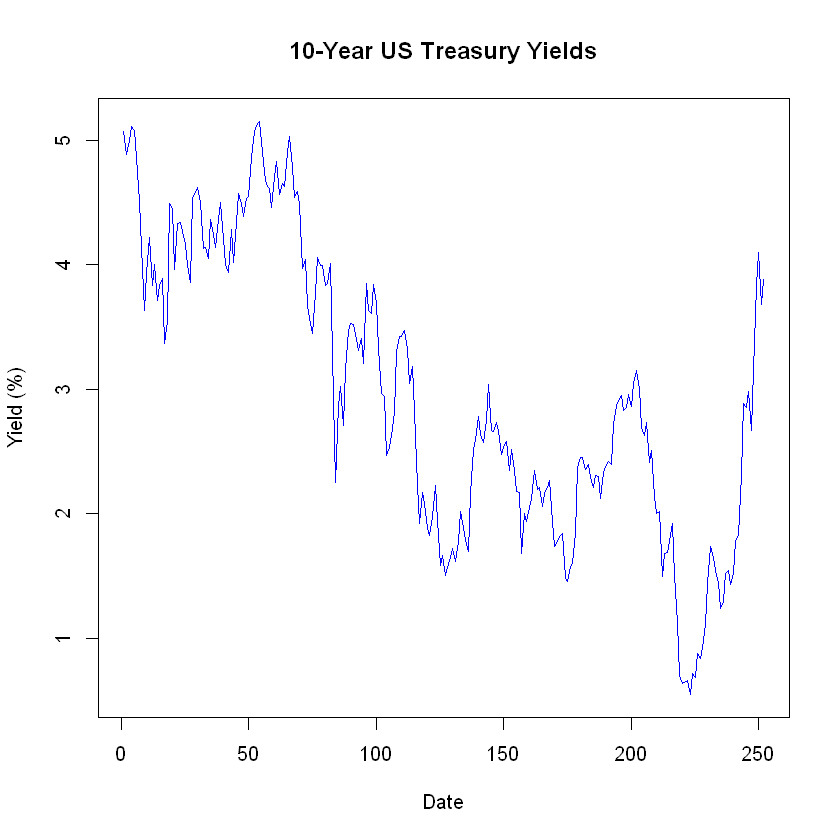

In [159]:
# Plot yields
 plot(x = index(yield_10y_monthly),
     y = yield_10y_monthly$DGS10,
     xlab = "Date",
     ylab = "Yield (%)",
     type = "l",
     col = "blue",
     main = "10-Year US Treasury Yields")

In [165]:
#10 yr yields vs rental opportunity

ten_year= tail(yield_10y_monthly,n=1)
risk_free_rate = ten_year[,2]

# compare gross rental yield to risk free rate
ratio= round(((gross_rental_yield*100)/risk_free_rate),2)
print(paste('The gross rental yield is ', ratio, 'times the risk free rate', '(',risk_free_rate,')'))


[1] "The gross rental yield is  2.78 times the risk free rate ( 3.88 )"
